In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv("fashion_dataset.csv")
df.isnull().sum()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36484 entries, 0 to 36483
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  36484 non-null  int64  
 1   gender              36484 non-null  object 
 2   masterCategory      36484 non-null  object 
 3   subCategory         36484 non-null  object 
 4   articleType         36484 non-null  object 
 5   baseColour          36484 non-null  object 
 6   season              36484 non-null  object 
 7   year                36484 non-null  float64
 8   usage               36484 non-null  object 
 9   productDisplayName  36484 non-null  object 
 10  filename            36484 non-null  object 
 11  link                36484 non-null  object 
 12  ratings             36484 non-null  int64  
 13  review              36484 non-null  object 
 14  Month               36484 non-null  object 
 15  Price (USD)         36484 non-null  int64  
 16  user

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
user_id1              0
user_id2              0
user_id3              0
user_id4              0
user_id5              0
dtype: int64

In [2]:
df.dropna(inplace=True)

In [3]:
catnames = [ 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season','usage','Month']
numnames = ['id','year','ratings','Price (USD)']

In [4]:
q25,q75 = np.percentile(df["year"],[25,75])
iqr = q75 - q25
iqr
iqr = q75 - q25
iqr
q0 = q25 - 1.5*iqr
q100 = q75 + 1.4*iqr
q0,q100


(np.float64(2009.5), np.float64(2013.4))

In [5]:
df = df[(df['year'] >= q0) & (df['year'] <= q100)]

In [6]:
df.shape

(28551, 21)

In [7]:
# label encoding categorical columns
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df_encoded = df.copy()
for i in catnames:
    df_encoded[i] = le.fit_transform(df[i])

In [8]:
df_encoded

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,link,ratings,review,Month,Price (USD),user_id1,user_id2,user_id3,user_id4,user_id5
0,8493,4,1,2,46,1,0,2011.0,0,Forever New Women Black Skirts,...,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,9,46,93810,67912,12506,31747,17972
1,30757,2,1,10,23,13,2,2012.0,1,Fabindia Men Grey Mangalgiri Kurta,...,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",11,29,24592,54541,98358,62538,23573
2,14881,4,0,0,17,1,2,2011.0,0,United Colors of Benetton Women Solid Black Ha...,...,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",10,39,13278,34966,71797,93928,90931
3,48449,2,1,10,63,2,2,2012.0,0,French Connection Men Blue T-shirt,...,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",1,39,46048,40972,76426,52622,68556
6,12868,2,2,8,16,1,1,2012.0,2,Lee Cooper Men Formal Black Shoes,...,http://assets.myntassets.com/v1/images/style/p...,3,Satisfactory for the price. for special occasi...,1,24,28289,90090,72873,61177,73624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,54078,2,2,8,48,29,2,2012.0,5,ADIDAS Men Orange F50 Adizero HG Football Shoes,...,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit! but could...",11,41,73318,82710,73614,14278,90599
36476,13183,2,2,8,48,42,0,2011.0,5,Fila Men Dls 96 White Sports Shoes,...,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy. and I'm v...",4,53,18851,57526,17113,37742,78084
36477,10264,2,2,8,16,1,2,2013.0,2,Clarks Men Goya Band Leather Black Formal Shoes,...,http://assets.myntassets.com/v1/images/style/p...,5,"Exceeded expectations, love the fit!.",9,43,55457,43386,59174,92447,86418
36479,45378,4,2,8,14,1,2,2012.0,0,Rocia Women Black Sandals,...,http://assets.myntassets.com/v1/images/style/p...,5,"High quality fabric, very satisfied. and I'm v...",9,48,40311,89887,99381,99037,40828


In [9]:
# scaling the columns
features_to_be_scaled = ['gender', 'masterCategory', 'subCategory', 'articleType',
    'baseColour', 'season', 'ratings', 'Price (USD)', 'Month', 'year','usage']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[features_to_be_scaled])
df_scaled

array([[ 1.16326346, -0.16326884, -1.79172866, ...,  1.00974801,
        -0.89061529, -0.51892601],
       [-0.69998114, -0.16326884,  0.65888518, ...,  1.5890629 ,
         0.74493865,  0.08280644],
       [ 1.16326346, -1.78240348, -2.40438213, ...,  1.29940545,
        -0.89061529, -0.51892601],
       ...,
       [-0.69998114,  1.4558658 ,  0.04623172, ...,  1.00974801,
         2.3804926 ,  0.68453889],
       [ 1.16326346,  1.4558658 ,  0.04623172, ...,  1.00974801,
         0.74493865, -0.51892601],
       [ 0.23164116,  1.4558658 ,  0.04623172, ..., -0.72819664,
        -0.89061529, -0.51892601]])

In [10]:
# applying pca for dimanesionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

In [11]:
# elbow method to decide clusters for k-means clustering analysis
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

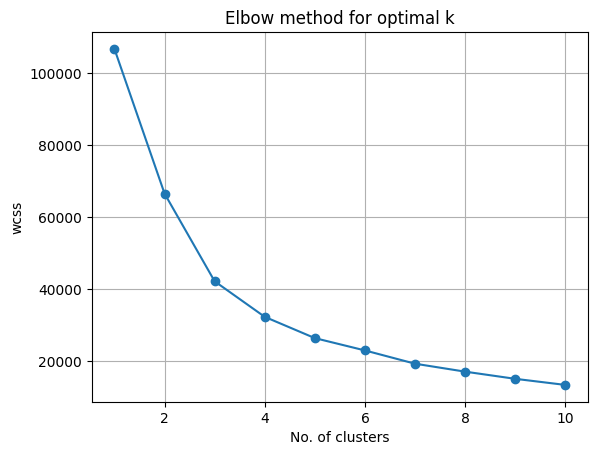

In [12]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.title("Elbow method for optimal k")
plt.grid(True)
plt.show()

In [13]:
df_pca = pd.DataFrame(pca_result,columns=['pca1','pca2'])
df_pca

,pca1,pca2
0,-0.429872,1.532470
1,-0.436964,-0.014366
2,-2.464212,0.116658
3,0.264773,1.068773
4,-0.197315,-0.542015
...,...,...
28546,0.943306,1.384033
28547,2.547851,1.992272
28548,-1.120116,1.742129
28549,-1.313849,1.894369


In [14]:
kmeans = KMeans(n_clusters=3,random_state=42)
df_pca["cluster"] = kmeans.fit_predict(df_pca)
df_pca

,pca1,pca2,cluster
0,-0.429872,1.532470,0
1,-0.436964,-0.014366,1
2,-2.464212,0.116658,1
3,0.264773,1.068773,0
4,-0.197315,-0.542015,2
...,...,...,...
28546,0.943306,1.384033,0
28547,2.547851,1.992272,0
28548,-1.120116,1.742129,1
28549,-1.313849,1.894369,1


In [15]:
df_pca.isnull().sum()

pca1       0
pca2       0
cluster    0
dtype: int64

In [16]:
df.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

# Now you can safely add the cluster column
df['cluster'] = df_pca['cluster']

In [17]:
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
user_id1              0
user_id2              0
user_id3              0
user_id4              0
user_id5              0
cluster               0
dtype: int64

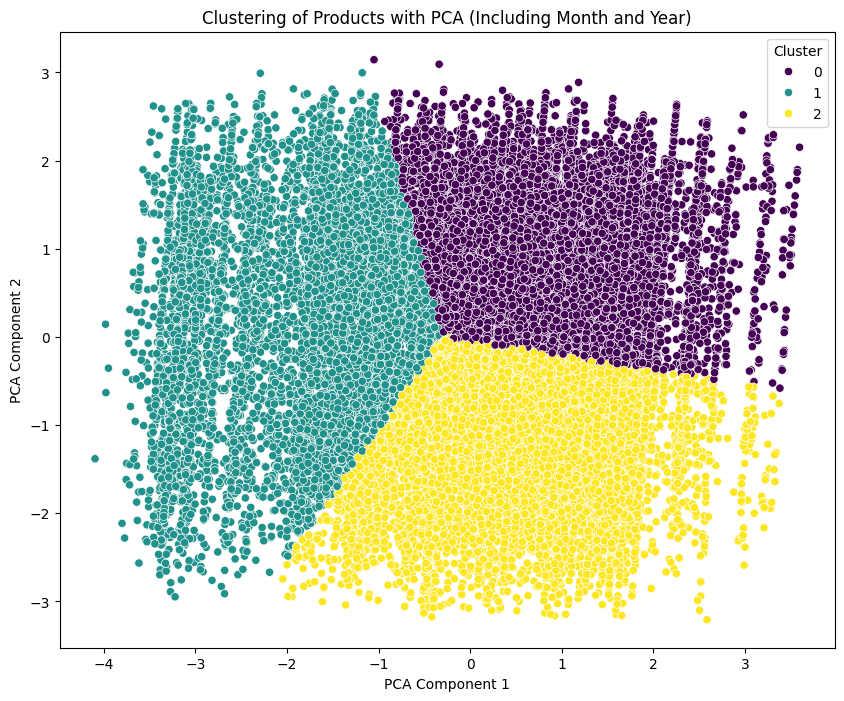

In [18]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_pca,
    x='pca1', y='pca2',
    hue='cluster',
    palette='viridis'
)
plt.title('Clustering of Products with PCA (Including Month and Year)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [19]:
import tensorflow as tf
import os

In [20]:
df.shape

(28551, 22)

In [21]:
IMAGE_SIZE = (60, 80)
BATCH_SIZE = 32

In [22]:
image_folder = r'C:\Users\adupa\Desktop\Ai_stylist\images'

In [23]:
# Create a list of full image paths from the CSV
image_paths = [os.path.join(image_folder, image_id) for image_id in df['filename']]

In [24]:
import os
path_not_exists = []
for path in image_paths:
    if not os.path.exists(path):
        print(f"File does not exist: {path}")
        path_not_exists.append(path[30:])

File does not exist: C:\Users\adupa\Desktop\Ai_stylist\images\39425.jpg
File does not exist: C:\Users\adupa\Desktop\Ai_stylist\images\12347.jpg


In [25]:
for i in path_not_exists:
    df = df[df['filename'] != i]
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,ratings,review,Month,Price (USD),user_id1,user_id2,user_id3,user_id4,user_id5,cluster
0,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011.0,Casual,Forever New Women Black Skirts,...,5,Amazing quality! Definitely recommend. Would r...,November,46,93810,67912,12506,31747,17972,0
1,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,...,4,"Perfect for any occasion, great buy..",September,29,24592,54541,98358,62538,23573,1
2,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,...,3,"It's okay, nothing special.!",October,39,13278,34966,71797,93928,90931,1
3,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,...,5,"Comfortable and stylish, worth the price. and ...",August,39,46048,40972,76426,52622,68556,0
4,12868,Men,Footwear,Shoes,Formal Shoes,Black,Spring,2012.0,Formal,Lee Cooper Men Formal Black Shoes,...,3,Satisfactory for the price. for special occasi...,August,24,28289,90090,72873,61177,73624,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28546,54078,Men,Footwear,Shoes,Sports Shoes,Orange,Summer,2012.0,Sports,ADIDAS Men Orange F50 Adizero HG Football Shoes,...,5,"Exceeded expectations, love the fit! but could...",September,41,73318,82710,73614,14278,90599,0
28547,13183,Men,Footwear,Shoes,Sports Shoes,White,Fall,2011.0,Sports,Fila Men Dls 96 White Sports Shoes,...,5,"Perfect for any occasion, great buy. and I'm v...",January,53,18851,57526,17113,37742,78084,0
28548,10264,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2013.0,Formal,Clarks Men Goya Band Leather Black Formal Shoes,...,5,"Exceeded expectations, love the fit!.",November,43,55457,43386,59174,92447,86418,1
28549,45378,Women,Footwear,Shoes,Flats,Black,Summer,2012.0,Casual,Rocia Women Black Sandals,...,5,"High quality fabric, very satisfied. and I'm v...",November,48,40311,89887,99381,99037,40828,1


In [26]:
image_paths = [os.path.join(image_folder, image_id) for image_id in df['filename']]

In [27]:
print(f"Number of valid paths: {len(image_paths)}")

Number of valid paths: 28551


In [28]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.io.read_file(path)  # Read the image file
    img = tf.image.decode_jpeg(img, channels=3)  # Decode the JPEG image
    img = tf.image.resize(img, IMAGE_SIZE)  # Resize the image to target size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

In [29]:
# Create a TensorFlow dataset from image paths
dataset = tf.data.Dataset.from_tensor_slices(image_paths)  # Create dataset from image paths
dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)  # Load and preprocess images
dataset = dataset.batch(BATCH_SIZE)  # Batch the dataset
dataset = dataset.prefetch(tf.data.AUTOTUNE)  # Optimize loading performance

In [30]:
for images_batch in dataset.take(1):
    print(f"Batch shape: {images_batch.shape}")

Batch shape: (32, 60, 80, 3)


In [31]:
# Number of images
num_images = len(image_paths)

# Number of batches
num_batches = num_images // BATCH_SIZE + int(num_images % BATCH_SIZE != 0)  # Add 1 if there's a remainder
print(f"Total number of batches: {num_batches}")

Total number of batches: 893


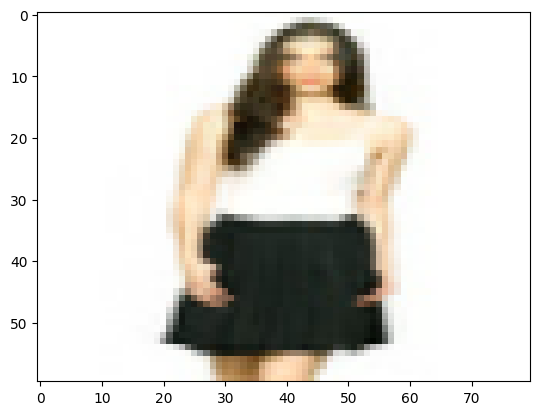

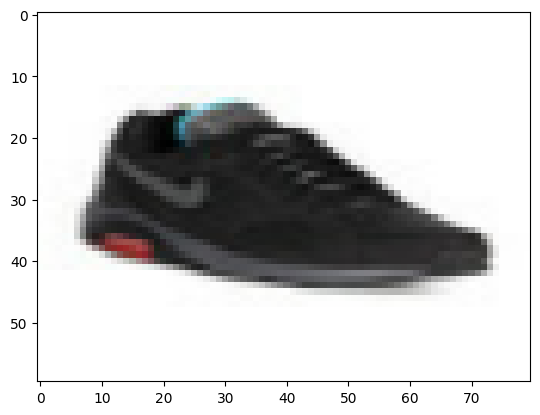

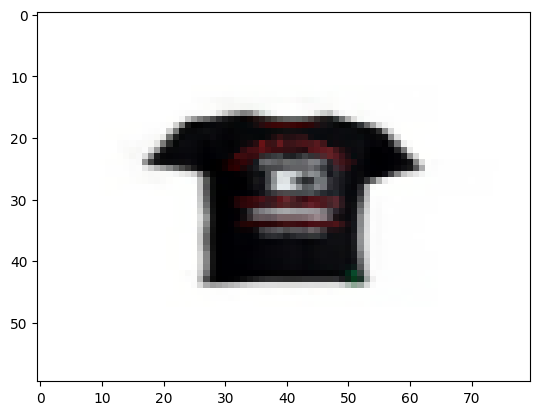

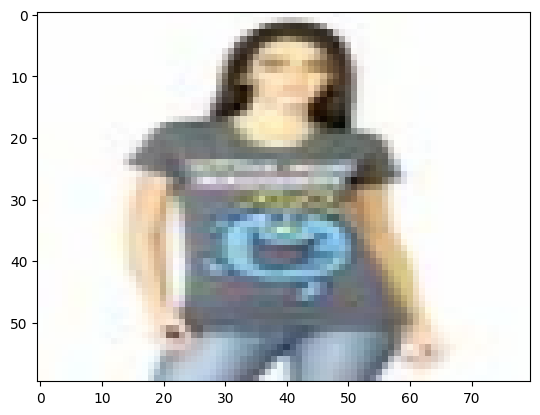

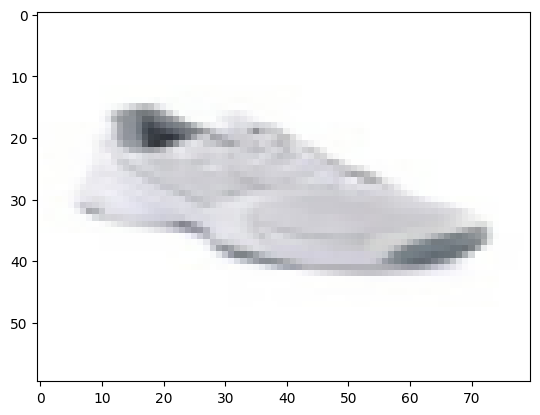

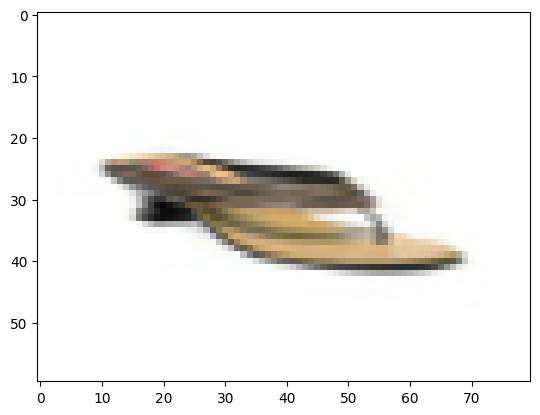

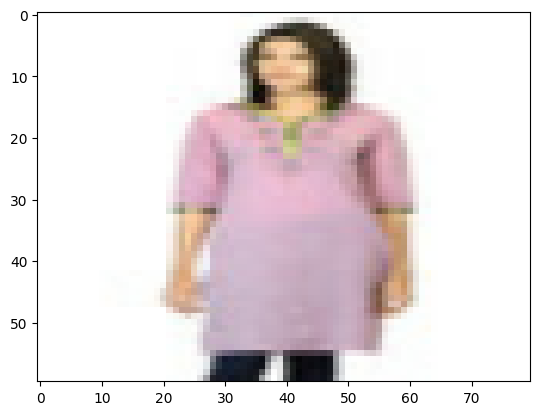

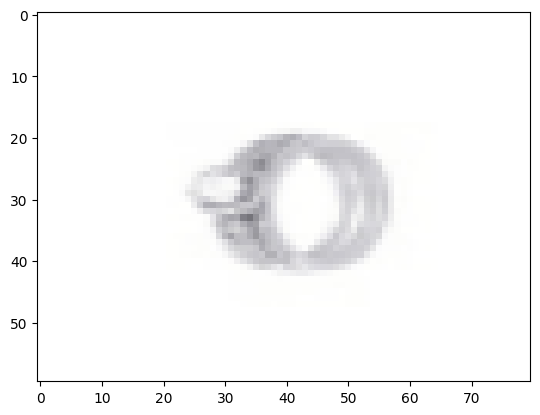

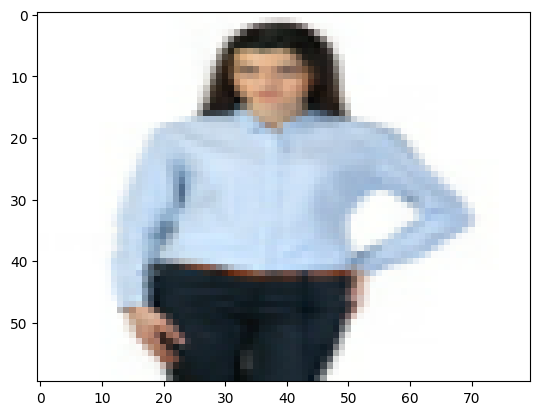

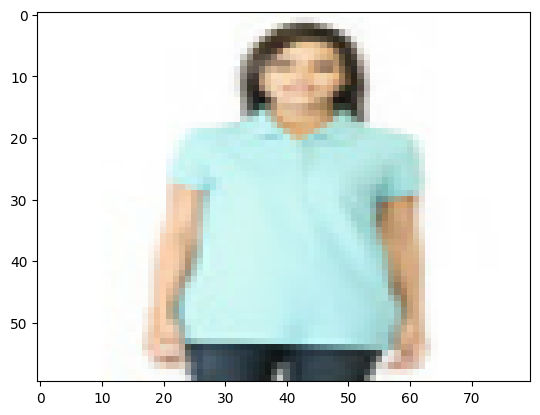

In [32]:
for images_batch in dataset.take(10):
    plt.imshow(images_batch[0])
    plt.show()

In [33]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,ratings,review,Month,Price (USD),user_id1,user_id2,user_id3,user_id4,user_id5,cluster
0,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011.0,Casual,Forever New Women Black Skirts,...,5,Amazing quality! Definitely recommend. Would r...,November,46,93810,67912,12506,31747,17972,0
1,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,...,4,"Perfect for any occasion, great buy..",September,29,24592,54541,98358,62538,23573,1
2,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,...,3,"It's okay, nothing special.!",October,39,13278,34966,71797,93928,90931,1
3,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,...,5,"Comfortable and stylish, worth the price. and ...",August,39,46048,40972,76426,52622,68556,0
4,12868,Men,Footwear,Shoes,Formal Shoes,Black,Spring,2012.0,Formal,Lee Cooper Men Formal Black Shoes,...,3,Satisfactory for the price. for special occasi...,August,24,28289,90090,72873,61177,73624,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28546,54078,Men,Footwear,Shoes,Sports Shoes,Orange,Summer,2012.0,Sports,ADIDAS Men Orange F50 Adizero HG Football Shoes,...,5,"Exceeded expectations, love the fit! but could...",September,41,73318,82710,73614,14278,90599,0
28547,13183,Men,Footwear,Shoes,Sports Shoes,White,Fall,2011.0,Sports,Fila Men Dls 96 White Sports Shoes,...,5,"Perfect for any occasion, great buy. and I'm v...",January,53,18851,57526,17113,37742,78084,0
28548,10264,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2013.0,Formal,Clarks Men Goya Band Leather Black Formal Shoes,...,5,"Exceeded expectations, love the fit!.",November,43,55457,43386,59174,92447,86418,1
28549,45378,Women,Footwear,Shoes,Flats,Black,Summer,2012.0,Casual,Rocia Women Black Sandals,...,5,"High quality fabric, very satisfied. and I'm v...",November,48,40311,89887,99381,99037,40828,1


In [34]:
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
user_id1              0
user_id2              0
user_id3              0
user_id4              0
user_id5              0
cluster               0
dtype: int64

In [35]:
df_encoded = df.copy()
le_dict = {}

for col in catnames:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    le_dict[col] = le

print("Encoded DataFrame:")
print(df_encoded)

subcategory_mapping = {label: idx for label, idx in zip(le_dict['subCategory'].classes_, le_dict['subCategory'].transform(le_dict['subCategory'].classes_))}
decode_mapping = {idx: label for idx, label in zip(le_dict['subCategory'].transform(le_dict['subCategory'].classes_),le_dict['subCategory'].classes_)}
masterCategory_mapping = {label: idx for label, idx in zip(le_dict['masterCategory'].classes_, le_dict['masterCategory'].transform(le_dict['masterCategory'].classes_))}
gender_mapping = {label: idx for label, idx in zip(le_dict['gender'].classes_, le_dict['gender'].transform(le_dict['gender'].classes_))}
colour_mapping = {label: idx for label, idx in zip(le_dict['baseColour'].classes_, le_dict['baseColour'].transform(le_dict['baseColour'].classes_))}

print("Subcategory Mapping (Original to Encoded):", subcategory_mapping)
print("Decoded Subcategory Mapping (Encoded to Original):", decode_mapping)
print("Master Category Mapping (Original to Encoded):", masterCategory_mapping)
print("Gender Mapping (Original to Encoded):", gender_mapping)
print("Colour Mapping (Original to Encoded):", colour_mapping)

Encoded DataFrame:
          id  gender  masterCategory  subCategory  articleType  baseColour  \
0       8493       4               1            2           46           1   
1      30757       2               1           10           23          13   
2      14881       4               0            0           17           1   
3      48449       2               1           10           63           2   
4      12868       2               2            8           16           1   
...      ...     ...             ...          ...          ...         ...   
28546  54078       2               2            8           48          29   
28547  13183       2               2            8           48          42   
28548  10264       2               2            8           16           1   
28549  45378       4               2            8           14           1   
28550   5864       3               2            8            7          25   

       season    year  usage  \
0           

In [36]:
df_encoded.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df_encoded['cluster'] = df['cluster']
df_encoded

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,ratings,review,Month,Price (USD),user_id1,user_id2,user_id3,user_id4,user_id5,cluster
0,8493,4,1,2,46,1,0,2011.0,0,Forever New Women Black Skirts,...,5,Amazing quality! Definitely recommend. Would r...,9,46,93810,67912,12506,31747,17972,0
1,30757,2,1,10,23,13,2,2012.0,1,Fabindia Men Grey Mangalgiri Kurta,...,4,"Perfect for any occasion, great buy..",11,29,24592,54541,98358,62538,23573,1
2,14881,4,0,0,17,1,2,2011.0,0,United Colors of Benetton Women Solid Black Ha...,...,3,"It's okay, nothing special.!",10,39,13278,34966,71797,93928,90931,1
3,48449,2,1,10,63,2,2,2012.0,0,French Connection Men Blue T-shirt,...,5,"Comfortable and stylish, worth the price. and ...",1,39,46048,40972,76426,52622,68556,0
4,12868,2,2,8,16,1,1,2012.0,2,Lee Cooper Men Formal Black Shoes,...,3,Satisfactory for the price. for special occasi...,1,24,28289,90090,72873,61177,73624,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28546,54078,2,2,8,48,29,2,2012.0,5,ADIDAS Men Orange F50 Adizero HG Football Shoes,...,5,"Exceeded expectations, love the fit! but could...",11,41,73318,82710,73614,14278,90599,0
28547,13183,2,2,8,48,42,0,2011.0,5,Fila Men Dls 96 White Sports Shoes,...,5,"Perfect for any occasion, great buy. and I'm v...",4,53,18851,57526,17113,37742,78084,0
28548,10264,2,2,8,16,1,2,2013.0,2,Clarks Men Goya Band Leather Black Formal Shoes,...,5,"Exceeded expectations, love the fit!.",9,43,55457,43386,59174,92447,86418,1
28549,45378,4,2,8,14,1,2,2012.0,0,Rocia Women Black Sandals,...,5,"High quality fabric, very satisfied. and I'm v...",9,48,40311,89887,99381,99037,40828,1


In [37]:
df_encoded.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
Month                 0
Price (USD)           0
user_id1              0
user_id2              0
user_id3              0
user_id4              0
user_id5              0
cluster               0
dtype: int64

In [38]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[['ratings', 'Price (USD)','year']])
scaled_df = pd.DataFrame(scaled_features, columns=['ratings', 'Price (USD)','year'])

processed_dataset = pd.concat([df_encoded[['id', 'gender', 'masterCategory', 'subCategory', 'articleType','baseColour', 'season', 'usage', 'productDisplayName', 'Month','cluster']],scaled_df], axis=1)
processed_dataset

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,Month,cluster,ratings,Price (USD),year
0,8493,4,1,2,46,1,0,0,Forever New Women Black Skirts,9,0,1.096569,1.078573,-0.890615
1,30757,2,1,10,23,13,2,1,Fabindia Men Grey Mangalgiri Kurta,11,1,0.315506,-0.423844,0.744939
2,14881,4,0,0,17,1,2,0,United Colors of Benetton Women Solid Black Ha...,10,1,-0.465558,0.459931,-0.890615
3,48449,2,1,10,63,2,2,0,French Connection Men Blue T-shirt,1,0,1.096569,0.459931,0.744939
4,12868,2,2,8,16,1,1,2,Lee Cooper Men Formal Black Shoes,1,2,-0.465558,-0.865732,0.744939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28546,54078,2,2,8,48,29,2,5,ADIDAS Men Orange F50 Adizero HG Football Shoes,11,0,1.096569,0.636686,0.744939
28547,13183,2,2,8,48,42,0,5,Fila Men Dls 96 White Sports Shoes,4,0,1.096569,1.697216,-0.890615
28548,10264,2,2,8,16,1,2,2,Clarks Men Goya Band Leather Black Formal Shoes,9,1,1.096569,0.813441,2.380493
28549,45378,4,2,8,14,1,2,0,Rocia Women Black Sandals,9,1,1.096569,1.255328,0.744939


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

processed_dataset['combined_features'] = processed_dataset[['gender', 'baseColour', 'masterCategory',
                                             'subCategory', 'articleType', 'year',
                                             'Month', 'ratings', 'season',
                                             'usage', 'Price (USD)', 'productDisplayName']].astype(str).agg(' '.join, axis=1)

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_dataset['combined_features'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [41]:
complementary_map = {
    'Topwear': ['Bottomwear', 'Shoes', 'Flip Flops', 'Jewellery', 'Eyewear', 'Belts', 'Bags', 'Watches', 'Wallets'],
    'Bottomwear': ['Topwear', 'Shoes', 'Flip Flops', 'Bags', 'Belts', 'Watches', 'Wallets'],
    'Bags': ['Topwear', 'Bottomwear', 'Shoes', 'Watches', 'Jewellery', 'Eyewear'],
    'Watches': ['Topwear', 'Bottomwear', 'Bags', 'Shoes', 'Jewellery'],
    'Shoes': ['Topwear', 'Bottomwear', 'Socks', 'Eyewear', 'Belts'],
    'Flip Flops': ['Topwear', 'Bottomwear', 'Socks', 'Belts', 'Eyewear'],
    'Jewellery': ['Topwear', 'Bottomwear', 'Saree', 'Watches', 'Eyewear'],
    'Eyewear': ['Topwear', 'Bottomwear', 'Shoes', 'Jewellery'],
    'Belts': ['Topwear', 'Bottomwear', 'Shoes', 'Flip Flops', 'Watches'],
    'Saree': ['Jewellery', 'Bags', 'Flip Flops','Shoes'],
    'Loungewear and Nightwear': ['Bottomwear', 'Socks'],
    'Wallets': ['Topwear', 'Bottomwear', 'Bags', 'Watches'],
    'Socks': ['Shoes', 'Flip Flops', 'Loungewear and Nightwear']
}

encoded_complementary_map = {
    subcategory_mapping[original]: [subcategory_mapping[comp] for comp in complements if comp in subcategory_mapping]
    for original, complements in complementary_map.items() if original in subcategory_mapping
}

print("Encoded Complementary Map:", encoded_complementary_map)


Encoded Complementary Map: {np.int64(10): [np.int64(2), np.int64(8), np.int64(4), np.int64(5), np.int64(3), np.int64(1), np.int64(0), np.int64(12), np.int64(11)], np.int64(2): [np.int64(10), np.int64(8), np.int64(4), np.int64(0), np.int64(1), np.int64(12), np.int64(11)], np.int64(0): [np.int64(10), np.int64(2), np.int64(8), np.int64(12), np.int64(5), np.int64(3)], np.int64(12): [np.int64(10), np.int64(2), np.int64(0), np.int64(8), np.int64(5)], np.int64(8): [np.int64(10), np.int64(2), np.int64(9), np.int64(3), np.int64(1)], np.int64(4): [np.int64(10), np.int64(2), np.int64(9), np.int64(1), np.int64(3)], np.int64(5): [np.int64(10), np.int64(2), np.int64(7), np.int64(12), np.int64(3)], np.int64(3): [np.int64(10), np.int64(2), np.int64(8), np.int64(5)], np.int64(1): [np.int64(10), np.int64(2), np.int64(8), np.int64(4), np.int64(12)], np.int64(7): [np.int64(5), np.int64(0), np.int64(4), np.int64(8)], np.int64(6): [np.int64(2), np.int64(9)], np.int64(11): [np.int64(10), np.int64(2), np.int6

In [42]:
colour_contrast_map = {
    'Black': ['White', 'Grey', 'Beige', 'Silver', 'Cream'],
    'Grey': ['Black', 'White', 'Red', 'Navy Blue'],
    'Blue': ['White', 'Cream', 'Yellow', 'Pink', 'Silver'],
    'Pink': ['Navy Blue', 'White', 'Beige', 'Grey'],
    'Brown': ['Cream', 'White', 'Beige', 'Olive', 'Mustard'],
    'Cream': ['Black', 'Blue', 'Brown', 'Navy Blue', 'Purple'],
    'Green': ['White', 'Black', 'Navy Blue', 'Yellow', 'Brown'],
    'White': ['Black', 'Blue', 'Red', 'Navy Blue', 'Grey'],
    'Navy Blue': ['White', 'Yellow', 'Cream', 'Pink', 'Beige'],
    'Yellow': ['Black', 'Navy Blue', 'Grey', 'Green', 'Purple'],
    'Silver': ['Black', 'Blue', 'Pink', 'Red'],
    'Red': ['White', 'Black', 'Grey', 'Beige'],
    'Beige': ['Navy Blue', 'Black', 'Red', 'Olive', 'Cream'],
    'Maroon': ['Cream', 'Beige', 'White', 'Olive'],
    'Gold': ['Black', 'White', 'Cream', 'Navy Blue'],
    'Magenta': ['White', 'Navy Blue', 'Cream'],
    'Lavender': ['Navy Blue', 'White', 'Grey'],
    'Multi': ['White', 'Black'],
    'Purple': ['Yellow', 'White', 'Cream'],
    'Charcoal': ['White', 'Cream', 'Blue'],
    'Orange': ['White', 'Black', 'Navy Blue'],
    'Tan': ['Navy Blue', 'White', 'Black'],
    'Olive': ['White', 'Yellow', 'Cream', 'Tan'],
    'Off White': ['Black', 'Grey', 'Navy Blue'],
    'Grey Melange': ['Black', 'White', 'Red', 'Blue'],
    'Rust': ['White', 'Cream', 'Beige', 'Navy Blue'],
    'Turquoise Blue': ['White', 'Black', 'Yellow'],
    'Mustard': ['White', 'Black', 'Brown', 'Navy Blue'],
    'Khaki': ['White', 'Navy Blue', 'Brown'],
    'Lime Green': ['White', 'Black', 'Grey'],
    'Peach': ['Blue', 'Black', 'Navy Blue'],
    'Sea Green': ['White', 'Black', 'Navy Blue'],
    'Teal': ['White', 'Cream', 'Navy Blue'],
    'Mauve': ['White', 'Grey', 'Blue'],
    'Copper': ['White', 'Black', 'Navy Blue'],
    'Steel': ['Black', 'White', 'Beige'],
    'Bronze': ['White', 'Black'],
    'Nude': ['White', 'Black', 'Beige'],
    'Metallic': ['White', 'Black', 'Silver'],
    'Taupe': ['White', 'Black', 'Beige'],
    'Fluorescent Green': ['White', 'Black'],
    'Burgundy': ['White', 'Beige', 'Grey'],
    'Mushroom Brown': ['White', 'Grey', 'Black'],
    'Coffee Brown': ['White', 'Beige', 'Cream']
}

encoded_complementary_colour_map = {
    colour_mapping[original]: [colour_mapping[comp] for comp in complements if comp in colour_mapping]
    for original, complements in colour_contrast_map.items() if original in colour_mapping
}

print("Encoded Complementary Map:", encoded_complementary_colour_map)

Encoded Complementary Map: {np.int64(1): [np.int64(42), np.int64(13), np.int64(0), np.int64(36), np.int64(9)], np.int64(13): [np.int64(1), np.int64(42), np.int64(33), np.int64(25)], np.int64(2): [np.int64(42), np.int64(9), np.int64(43), np.int64(31), np.int64(36)], np.int64(31): [np.int64(25), np.int64(42), np.int64(0), np.int64(13)], np.int64(4): [np.int64(9), np.int64(42), np.int64(0), np.int64(28), np.int64(24)], np.int64(9): [np.int64(1), np.int64(2), np.int64(4), np.int64(25), np.int64(32)], np.int64(12): [np.int64(42), np.int64(1), np.int64(25), np.int64(43), np.int64(4)], np.int64(42): [np.int64(1), np.int64(2), np.int64(33), np.int64(25), np.int64(13)], np.int64(25): [np.int64(42), np.int64(43), np.int64(9), np.int64(31), np.int64(0)], np.int64(43): [np.int64(1), np.int64(25), np.int64(13), np.int64(12), np.int64(32)], np.int64(36): [np.int64(1), np.int64(2), np.int64(31), np.int64(33)], np.int64(33): [np.int64(42), np.int64(1), np.int64(13), np.int64(0)], np.int64(0): [np.int6

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendations(product_id, df_encoded, tfidf_matrix, encoded_complementary_map, encoded_complementary_colour_map):
    # Get the index and details of the target product
    try:
        product_index = df_encoded[df_encoded['id'] == product_id].index[0]
    except IndexError:
        print(f"Product ID {product_id} not found in the dataset")
        return []

    # Extract TF-IDF vector for the target product
    target_vector = tfidf_matrix[product_index]

    # Get target product's attributes
    encoded_subcategory = df_encoded.loc[product_index, 'subCategory']
    product_gender = df_encoded.loc[product_index, 'gender']
    encoded_colour = df_encoded.loc[product_index, 'baseColour']
    print(f"Product Index: {product_index}")
    print(f"Encoded Subcategory: {encoded_subcategory}, Gender: {product_gender}, Colour: {encoded_colour}")
    print(f"Subcategory: {decode_mapping[encoded_subcategory]}")

    # Initialize recommendations dictionary for unique items from each complementary subcategory
    recommendations = {}
    complementary_subcategories = encoded_complementary_map.get(encoded_subcategory, [])
    complementary_colours = encoded_complementary_colour_map.get(encoded_colour, [])
    footwear_selected = False  # Track if a footwear item has already been added

    for idx, row in df_encoded.iterrows():
        # Skip the target item itself
        if idx == product_index:
            continue

        # Compute similarity score with the target item
        item_vector = tfidf_matrix[idx]
        similarity_score = cosine_similarity(target_vector, item_vector.reshape(1, -1))[0][0]

        # Retrieve details of the current item
        recommended_subcategory = row['subCategory']
        recommended_master_category = row['masterCategory']
        recommended_colour = row['baseColour']

        # Check conditions for complementary subcategory, gender, color contrast, and footwear restriction
        if (recommended_subcategory in complementary_subcategories and
            row['gender'] == product_gender and
            recommended_colour in complementary_colours):

            # If the item belongs to 'Footwear', ensure only one item is selected
            if recommended_master_category == 2:
                if footwear_selected:
                    continue  # Skip if a footwear item is already added
                else:
                    footwear_selected = True  # Mark footwear as selected

            # Add or replace recommendation if this item has higher similarity
            if (recommended_subcategory not in recommendations or
                recommendations[recommended_subcategory][1] < similarity_score):

                recommendations[recommended_subcategory] = (row['id'], similarity_score)

            # Stop if all complementary subcategories are covered
            if len(recommendations) == len(complementary_subcategories):
                break

    # Collect the recommended product IDs
    recommended_product_ids = [item[0] for item in recommendations.values()]

    # Check if all complementary subcategories were covered
    if len(recommended_product_ids) < len(complementary_subcategories):
        print("Some complementary subcategories could not be found.")

    return recommended_product_ids


In [44]:
df_encoded.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,ratings,review,Month,Price (USD),user_id1,user_id2,user_id3,user_id4,user_id5,cluster
0,8493,4,1,2,46,1,0,2011.0,0,Forever New Women Black Skirts,...,5,Amazing quality! Definitely recommend. Would r...,9,46,93810,67912,12506,31747,17972,0
1,30757,2,1,10,23,13,2,2012.0,1,Fabindia Men Grey Mangalgiri Kurta,...,4,"Perfect for any occasion, great buy..",11,29,24592,54541,98358,62538,23573,1
2,14881,4,0,0,17,1,2,2011.0,0,United Colors of Benetton Women Solid Black Ha...,...,3,"It's okay, nothing special.!",10,39,13278,34966,71797,93928,90931,1
3,48449,2,1,10,63,2,2,2012.0,0,French Connection Men Blue T-shirt,...,5,"Comfortable and stylish, worth the price. and ...",1,39,46048,40972,76426,52622,68556,0
4,12868,2,2,8,16,1,1,2012.0,2,Lee Cooper Men Formal Black Shoes,...,3,Satisfactory for the price. for special occasi...,1,24,28289,90090,72873,61177,73624,2


In [45]:
processed_dataset.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,Month,cluster,ratings,Price (USD),year,combined_features
0,8493,4,1,2,46,1,0,0,Forever New Women Black Skirts,9,0,1.096569,1.078573,-0.890615,4 1 1 2 46 -0.8906152906981095 9 1.09656908794...
1,30757,2,1,10,23,13,2,1,Fabindia Men Grey Mangalgiri Kurta,11,1,0.315506,-0.423844,0.744939,2 13 1 10 23 0.7449386531319587 11 0.315505720...
2,14881,4,0,0,17,1,2,0,United Colors of Benetton Women Solid Black Ha...,10,1,-0.465558,0.459931,-0.890615,4 1 0 0 17 -0.8906152906981095 10 -0.465557647...
3,48449,2,1,10,63,2,2,0,French Connection Men Blue T-shirt,1,0,1.096569,0.459931,0.744939,2 2 1 10 63 0.7449386531319587 1 1.09656908794...
4,12868,2,2,8,16,1,1,2,Lee Cooper Men Formal Black Shoes,1,2,-0.465558,-0.865732,0.744939,2 1 2 8 16 0.7449386531319587 1 -0.46555764740...


In [46]:
product_id= 30757
recommended_products = get_recommendations(product_id,processed_dataset,tfidf_matrix,encoded_complementary_map,encoded_complementary_colour_map)
print("Recommended products:", recommended_products)

Product Index: 1
Encoded Subcategory: 10, Gender: 2, Colour: 13
Subcategory: Topwear
Some complementary subcategories could not be found.
Recommended products: [12868, 30736, 42965, 42953, 29192]


In [47]:
from PIL import Image
path_images = []
image_url = f'C:/Users/adupa/Desktop/Ai_stylist/images/'
for i in recommended_products:
    path_images.append(image_url + df[df.id==i]['filename'].values[0])
path_images

['C:/Users/adupa/Desktop/Ai_stylist/images/12868.jpg',
 'C:/Users/adupa/Desktop/Ai_stylist/images/30736.jpg',
 'C:/Users/adupa/Desktop/Ai_stylist/images/42965.jpg',
 'C:/Users/adupa/Desktop/Ai_stylist/images/42953.jpg',
 'C:/Users/adupa/Desktop/Ai_stylist/images/29192.jpg']

In [48]:
import cv2
import numpy as np
from PIL import Image

image_path = f'C:/Users/adupa/Desktop/Ai_stylist/images/{product_id}.jpg'
#image_path = r'C:\Users\adupa\Desktop\Ai_stylist\images{product_id}.jpg'

pil_image = Image.open(image_path)
image_array = np.array(pil_image)
resized_image = cv2.resize(image_array, IMAGE_SIZE)

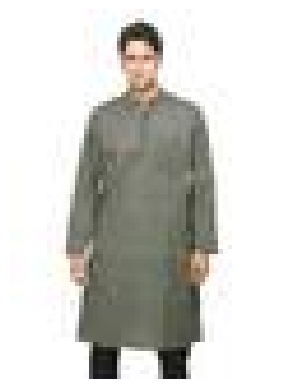

In [49]:
plt.imshow(resized_image)
plt.axis("off")
plt.show()

In [50]:
rec_images = []
for i in path_images:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images.append(resized_image)

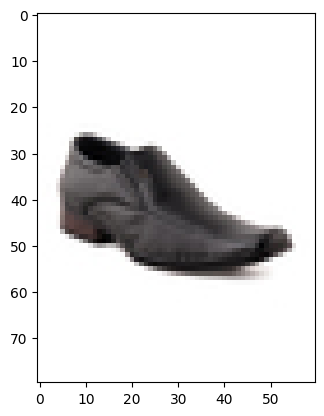

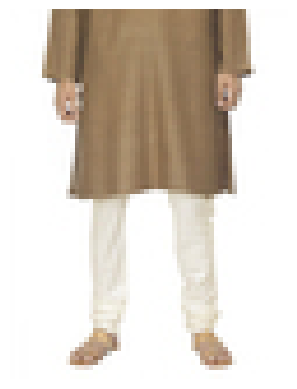

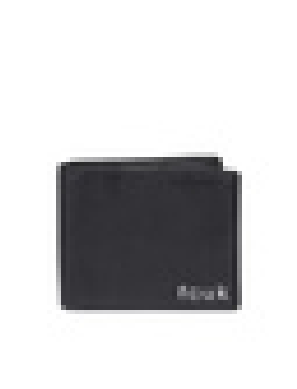

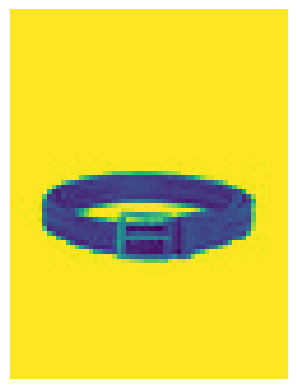

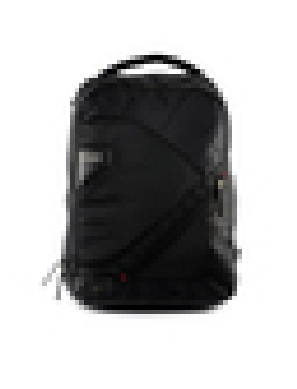

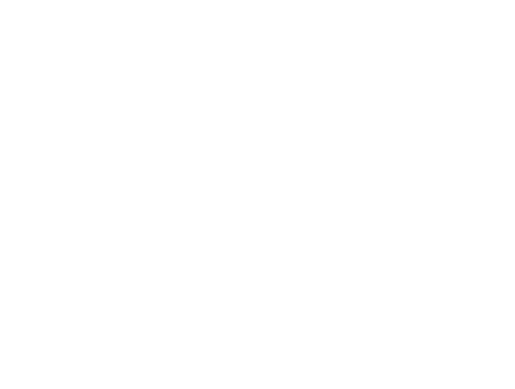

In [51]:
for i in rec_images:
    plt.imshow(i)
    plt.show()
    plt.axis("off")

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

def evaluate_recommendation_system_batch(
    df_encoded,
    tfidf_matrix,
    encoded_complementary_map,
    encoded_complementary_colour_map,
    product_ids,
    k=10,
    batch_size=1000,
    output_file="evaluation_results.csv",
):
    """
    Evaluate the recommendation system in batches and save intermediate results.

    Parameters:
        df_encoded: Processed dataset with encoded features.
        tfidf_matrix: TF-IDF matrix representing product features.
        encoded_complementary_map: Complementary subcategory mapping.
        encoded_complementary_colour_map: Complementary color mapping.
        product_ids: List of product IDs to evaluate.
        k: Number of recommendations per product to consider.
        batch_size: Number of products to process in a single batch.
        output_file: File to save evaluation results.

    Returns:
        None. Saves evaluation results in the specified file.
    """
    num_products = len(product_ids)
    total_batches = (num_products + batch_size - 1) // batch_size  # Ceiling division

    precision_scores = []
    recall_scores = []
    f1_scores = []
    total_complementary_subcategories = 0
    correct_recommendations = 0
    total_recommendations = 0

    # Iterate through the dataset in batches
    for batch_num in range(total_batches):
        start_idx = batch_num * batch_size
        end_idx = min(start_idx + batch_size, num_products)
        batch_product_ids = product_ids[start_idx:end_idx]

        print(f"Processing batch {batch_num + 1}/{total_batches}...")

        for product_id in batch_product_ids:
            recommended_products = get_recommendations(
                product_id,
                df_encoded,
                tfidf_matrix,
                encoded_complementary_map,
                encoded_complementary_colour_map,
            )

            if not recommended_products:
                continue  # Skip products that have no recommendations

            recommended_products = recommended_products[:k]

            original_subcategory = df_encoded.loc[
                df_encoded["id"] == product_id, "subCategory"
            ].values[0]
            complementary_subcategories = encoded_complementary_map.get(
                original_subcategory, []
            )
            total_complementary_subcategories += len(complementary_subcategories)

            correct_count = 0
            for rec_id in recommended_products:
                rec_subcategory = df_encoded.loc[
                    df_encoded["id"] == rec_id, "subCategory"
                ].values[0]
                if rec_subcategory in complementary_subcategories:
                    correct_recommendations += 1
                    correct_count += 1

            precision = (
                correct_count / len(recommended_products) if recommended_products else 0
            )
            recall = (
                correct_count / len(complementary_subcategories)
                if complementary_subcategories
                else 0
            )
            f1 = (
                2 * (precision * recall) / (precision + recall)
                if (precision + recall) > 0
                else 0
            )

            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)

            total_recommendations += len(recommended_products)

        # Save intermediate results to disk
        batch_results = pd.DataFrame(
            {
                "Batch Number": [batch_num + 1] * len(batch_product_ids),
                "Precision@K": precision_scores,
                "Recall@K": recall_scores,
                "F1@K": f1_scores,
            }
        )
        if batch_num == 0:
            batch_results.to_csv(output_file, index=False)
        else:
            batch_results.to_csv(output_file, mode="a", index=False, header=False)

        print(f"Batch {batch_num + 1} processed and saved.")

    # Compute overall metrics
    average_precision = np.mean(precision_scores) if precision_scores else 0
    average_recall = np.mean(recall_scores) if recall_scores else 0
    average_f1 = np.mean(f1_scores) if f1_scores else 0
    coverage = (
        total_recommendations / total_complementary_subcategories
        if total_complementary_subcategories > 0
        else 0
    )

    # Final Summary
    print(f"Final Evaluation Results for {num_products} Products:")
    print(f"Average Precision@K: {average_precision:.2%}")
    print(f"Average Recall@K: {average_recall:.2%}")
    print(f"Average F1@K: {average_f1:.2%}")
    print(f"Coverage: {coverage:.2%}")
    print(f"Total Complementary Subcategories: {total_complementary_subcategories}")
    print(f"Correct Recommendations: {correct_recommendations}")
    print(f"Total Recommendations: {total_recommendations}")


# Example Usage:
product_ids = processed_dataset["id"].values
evaluate_recommendation_system_batch(
    processed_dataset,
    tfidf_matrix,
    encoded_complementary_map,
    encoded_complementary_colour_map,
    product_ids,
    k=5,
    batch_size=100,  # Adjust batch size as needed
    output_file="evaluation_results.csv",
)


Processing batch 1/286...
Product Index: 0
Encoded Subcategory: 2, Gender: 4, Colour: 1
Subcategory: Bottomwear
Some complementary subcategories could not be found.
Product Index: 1
Encoded Subcategory: 10, Gender: 2, Colour: 13
Subcategory: Topwear
Some complementary subcategories could not be found.
Product Index: 2
Encoded Subcategory: 0, Gender: 4, Colour: 1
Subcategory: Bags
Some complementary subcategories could not be found.
Product Index: 3
Encoded Subcategory: 10, Gender: 2, Colour: 2
Subcategory: Topwear
Some complementary subcategories could not be found.
Product Index: 4
Encoded Subcategory: 8, Gender: 2, Colour: 1
Subcategory: Shoes
Some complementary subcategories could not be found.
Product Index: 5
Encoded Subcategory: 4, Gender: 2, Colour: 1
Subcategory: Flip Flops
Some complementary subcategories could not be found.
Product Index: 6
Encoded Subcategory: 10, Gender: 4, Colour: 31
Subcategory: Topwear
Some complementary subcategories could not be found.
Product Index: 7

ValueError: All arrays must be of the same length